<a href="https://colab.research.google.com/github/mk688/IntravascularBrachytherapy/blob/master/VisualizeDose2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize the dose scored from EGSnrc.
Location is fixed from -6 to 6 and the last row should be Air. 
The input file has to have the regions in the same order as specified in Location.

In [ ]:
pip install git+https://github.com/anntzer/mplcursors

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
import pandas.util.testing as tm
import mplcursors

In [ ]:
# Upload output.txt file which contains the scored dose
# Make sure you use a unique file name especially when you upload an updated file. 
# It saves all files - doesn't overwrite it.

from google.colab import files
uploaded = files.upload()

print(uploaded)

In [4]:
# Read output file from the EGSnrc program "Summary of region dosimetry per particle"
# Make sure to modify the name of objFile to match with your output file.

dicRow = {}
DoseTable = []

objFile = open('output07202020.txt','r')
for row in objFile:
  lstRow = row.split()
  dicRow = {"ir": int(lstRow[0]), "Dose Scored": float(lstRow[8])}
  DoseTable.append(dicRow)
objFile.close()


Run the following cell with the fixed Location only with the simulation output with the source at the center.  normDose should be defined with the dose scored at 2 mm when the source is positioned at the center

In [6]:
# Location is fixed from -6 to 6

Location = [-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,0]
normIndex = Location.index(2)

# Normalize the dose such that Dose @ 2mm = 100%
normDose = DoseTable[normIndex]['Dose Scored']

In [8]:
# Normalize the dose based on the prescription dose (normDose) at 2mm with the assumption that the source is centered.

normDoseTable = []
for each in DoseTable:
  normDoseEach = (each['Dose Scored']/normDose)*100
  normDoseTable.append(normDoseEach)

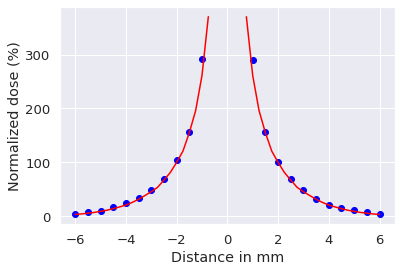

In [11]:
# Plot normDoseTable (y-axis) vs. Location (x-axis)
indices = [i for i in range(len(normDoseTable)) if normDoseTable[i]>400] 
LocationPlot = list(Location)
normDoseTablePlot = list(normDoseTable)
if indices:
  for each in indices:
    del LocationPlot[each]
    del normDoseTablePlot[each]
    indices[:] = [number-1 for number in indices]  

# Published PDD for Sr-90
xaxis1 = np.linspace(0.75, 6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
xaxis2 = np.linspace(-0.75, -6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
yaxis = [370, 261, 196, 155, 121, 100, 81.3, 67.1, 53.8, 45.6, 38.5, 31.6, 25.8, 20.9, 17.4, 14.2, 11.3, 9.2, 7.22, 5.83, 4.42, 3.54]

plt.plot(LocationPlot, normDoseTablePlot, 'o', color='blue')
plt.plot(xaxis1, yaxis, color='red')
plt.plot(xaxis2, yaxis, color='red')
plt.xlabel('Distance in mm')
plt.ylabel('Normalized dose (%)')
mplcursors.cursor(hover=True)
plt.show()
